# Exercise 5

Omri Gruman, 318965621

Shiraz Shay, 205948581

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## 1. Data

In [2]:
data_bunch = load_iris()
print(data_bunch.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X = data_bunch.data
y = data_bunch.target
y_names = set(data_bunch.target_names)

X.shape, y.shape, set(y), y_names

((150, 4), (150,), {0, 1, 2}, {'setosa', 'versicolor', 'virginica'})

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

## 2. Model

### 2.1 The hypothesis space

We stay in the framework of the linear model.

In binary Logistic Regression it made sense to pick our hypothesis space to be
$$
\forall_{x \in S}: h(x)=h_{w \in R^n}(x) = \theta(w^Tx) 
$$

Where $\theta: \mathbb{R} \to [0,1]$ is a function whose output can represent probability.

But in multiclass Logistic Regression we will pick our hypothesis space to be
$$
\forall_{x \in R^n}: h(x)=h_{W \in R^{nxc}}(x) = \theta(W^Tx)
$$

Where $\theta: \mathbb{R} \to [0,1]^c$ is a function whose output can represent probability $\textbf{distribution}$ over all $\textbf{c}$ classes.

We will the the $\textbf{softmax}$ function, such that 
$$
\forall_{x \in R^c}: \text{softmax}(x) = \begin{pmatrix} \frac{e^{x_0}}{\sum_{k=0}^{c-1} e^{x_k}} \\ \\ \frac{e^{x_1}}{\sum_{k=0}^{c-1} e^{x_k}} \\ \\ \vdots \\ \\ \frac{e^{x_c}}{\sum_{k=0}^{c-1} e^{x_k}} \end{pmatrix}
$$

### 2.2 Loss function

For the error function we follow the Maximum Likelihood paradime.

In binary Logistic Regression we search for $h=h_w$ that maximizes:
$$
\Pi_{i: y_i=1} h(x_i) \Pi_{y_i=-1}(1-h(x_i))
$$

But in Multiclass Logistic Regression we search for $h=h_w$ that maximizes:
$$
\Pi_{i: y_i=0} [p_{i,0}] * \Pi_{i: y_i=1} [p_{i,1}] * \ldots * \Pi_{i: y_i=c-1} [p_{i,c-1}] = \Pi_{k=0}^{c-1} \Pi_{i: y_i=k} [p_{i,k}]\\
$$

Such that,
$$
\forall_{k \in 0..{c-1}} \forall_{i \in 0..{N-1}}: p_{i,k} = h_W(x_i)_k = \text{softmax}(W^T x_i)_k
$$

We have:
$$
\text{argmax}_{W \in R^{nxc}} \Pi_{k=0}^{c-1} \Pi_{i: y_i=k} [p_{i,k}]
= \text{argmax}_{W \in R^{nxc}} \sum_{k=0}^{C-1} \sum_{i: y_i=k} ln[p_{i,k}]
= \text{argmin}_{W \in R^{nxc}} -\frac{1}{N} \sum_{k=0}^{C-1} \sum_{i: y_i=k} ln[p_{i,k}]
$$

Finally, our loss function:
$$
L(W) = -\frac{1}{N} \sum_{k=0}^{C-1} \sum_{i: y_i=k} ln[p_{i,k}]
$$

### 2.3 Loss function derivation

Let's observe a single sample from the $\textbf{Iris}$ dataset, where $x = \begin{pmatrix} x_0 \\ x_1 \\ x_2 \\ x_3 \end{pmatrix}$, 
its $\textbf{one-hot}$ label is $y = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}$, 
and the weight matrix of our model is $W = \begin{pmatrix} w_{0,0} & w_{0,1} & w_{0,2} \\ w_{1,0} & w_{1,1} & w_{1,2} \\ w_{2,0} & w_{2,1} & w_{2,2} \\ w_{3,0} & w_{3,1} & w_{3,2} \end{pmatrix}$.

We will define: $\quad L(W) = -ln[p_1], \quad p_1 = h_W(x)_1 = \frac{e^{\hat{y}_1}}{D}, \quad D = \sum_{k} e^{\hat{y}_k},  \quad \hat{y} = W^T x$

Then, our derivative turns out to be
$$
\frac{\delta{L(W)}}{\delta{W}} =
\frac{\delta{L(W)}}{\delta{p1}} \frac{\delta{p1}}{\delta{W}} =
\frac{\delta{L(W)}}{\delta{p1}} \frac{\delta{p1}}{\delta{\hat{y}}} \frac{\delta{\hat{y}}}{\delta{W}} =
\frac{\delta{L(W)}}{\delta{p1}}
    (\frac{\delta{p1}}{\delta{\hat{y_0}}} \frac{\delta{\hat{y_0}}}{\delta{W}} + 
     \frac{\delta{p1}}{\delta{\hat{y_1}}} \frac{\delta{\hat{y_1}}}{\delta{W}} + 
     \frac{\delta{p1}}{\delta{\hat{y_2}}} \frac{\delta{\hat{y_2}}}{\delta{W}})
$$

Such that
$$
\frac{\delta{L(W)}}{\delta{p1}} = \frac{1}{p1}, 
\qquad
\frac{\delta{p1}}{\delta{\hat{y}_0}} = \frac{-e^{\hat{y}_1}e^{\hat{y}_0}}{D^2} = - \frac{e^{\hat{y}_1}}{D} \frac{e^{\hat{y}_0}}{D} = -p_1 p_0,
\qquad
\frac{\delta{p1}}{\delta{\hat{y}_1}} = \frac{e^{\hat{y}_1}D - e^{\hat{y}_1}e^{\hat{y}_1}}{(D)^2} = \frac{e^{\hat{y}_1}}{D} (\frac{D}{D} - \frac{e^{\hat{y}_1}}{D}) = p_1 (1 - p_1)
\qquad
\frac{\delta{p1}}{\delta{\hat{y}_2}} = \frac{-e^{\hat{y}_1}e^{\hat{y}_2}}{(D)^2} = - \frac{e^{\hat{y}_1}}{D} \frac{e^{\hat{y}_2}}{D} = -p_1 p_2,
$$

Up until now we've got:
$$
\frac{\delta{L(W)}}{\delta{W}} =
- \frac{1}{p1} (-p_1 p_0 \frac{\delta{\hat{y_0}}}{\delta{W}} + p_1 (1 - p_1) \frac{\delta{\hat{y_1}}}{\delta{W}} + -p_1 p_2 \frac{\delta{\hat{y_2}}}{\delta{W}}) =
(p_0 \frac{\delta{\hat{y_0}}}{\delta{W}} + (p_1 - 1) \frac{\delta{\hat{y_1}}}{\delta{W}} + p_2 \frac{\delta{\hat{y_2}}}{\delta{W}})
$$

Then,
$$
\frac{\delta{\hat{y_0}}}{\delta{W}} = 
\begin{pmatrix} 
\frac{\delta{\hat{y_0}}}{\delta{W_{0,0}}} & \frac{\delta{\hat{y_0}}}{\delta{W_{0,1}}} & \frac{\delta{\hat{y_0}}}{\delta{W_{0,2}}} \\ \\
\frac{\delta{\hat{y_0}}}{\delta{W_{1,0}}} & \frac{\delta{\hat{y_0}}}{\delta{W_{1,1}}} & \frac{\delta{\hat{y_0}}}{\delta{W_{1,2}}} \\ \\
\frac{\delta{\hat{y_0}}}{\delta{W_{2,0}}} & \frac{\delta{\hat{y_0}}}{\delta{W_{2,1}}} & \frac{\delta{\hat{y_0}}}{\delta{W_{2,2}}} \\ \\ 
\frac{\delta{\hat{y_0}}}{\delta{W_{3,0}}} & \frac{\delta{\hat{y_0}}}{\delta{W_{3,1}}} & \frac{\delta{\hat{y_0}}}{\delta{W_{3,2}}}
\end{pmatrix} =
\begin{pmatrix} 
x_0 & 0 & 0 \\ \\
x_1 & 0 & 0 \\ \\
x_2 & 0 & 0 \\ \\
x_3 & 0 & 0 
\end{pmatrix}
$$

And in the similar way,
$$
\frac{\delta{\hat{y_1}}}{\delta{W}} = 
\begin{pmatrix} 
0 & x_0 &  0 \\ \\
0 & x_1 &  0 \\ \\
0 & x_2 &  0 \\ \\
0 & x_3 &  0 
\end{pmatrix},
\qquad
\frac{\delta{\hat{y_2}}}{\delta{W}} = 
\begin{pmatrix} 
0 & 0 & x_0 \\ \\
0 & 0 & x_1 \\ \\
0 & 0 & x_2 \\ \\
0 & 0 & x_3 
\end{pmatrix}
$$

Finally,
$$
\frac{\delta{L(W)}}{\delta{W}} =
(p_0 \begin{pmatrix} x_0 & 0 & 0 \\ \\ x_1 & 0 & 0 \\ \\ x_2 & 0 & 0 \\ \\ x_3 & 0 & 0 \end{pmatrix} +
 (p_1 - 1) \begin{pmatrix} 0 & x_0 &  0 \\ \\ 0 & x_1 & 0 \\ \\ 0 & x_2 & 0 \\ \\ 0 & x_3 & 0 \end{pmatrix} +
 p_2 \begin{pmatrix} 0 & 0 & x_0 \\ \\ 0 & 0 & x_1 \\ \\ 0 & 0 & x_2 \\ \\ 0 & 0 & x_3 \end{pmatrix}) = 
\begin{pmatrix} 
(0 - p_0)x_0 & (1 - p_1)x_0 & (0 - p_2)x_0 \\ \\ 
(0 - p_0)x_1 & (1 - p_1)x_1 & (0 - p_2)x_1 \\ \\ 
(0 - p_0)x_2 & (1 - p_1)x_2 & (0 - p_2)x_2 \\ \\ 
(0 - p_0)x_3 & (1 - p_1)x_3 & (0 - p_2)x_3 
\end{pmatrix} =
\begin{pmatrix} x_0 \\ x_1 \\ x_2 \\ x_3 \end{pmatrix} 
\begin{bmatrix} \begin{pmatrix} p_0 & p_1 & p_2 \end{pmatrix} - \begin{pmatrix} 0 & 1 & 0 \end{pmatrix} \end{bmatrix}
$$

And to wrap it all up, we can write the gradient as a closed formula for the general case:
$$
\frac{\delta{L(W)}}{\delta{W}} = x (softmax(W^Tx) - y)^T
$$

And to make things easier, given a dataset with $N$ samples where 

1. $X \in R^{n,N}$ is the feature matrix, in which every column is a $\textbf{sample}$
2. $Y \in R^{c,N}$ is the label matrix, in which every column is a $\textbf{one-hot vector}$
3. $P \in R^{c,N}$ is the logits matrix, in which every column is $\textbf{softmax vector}$

we can calculate the $\frac{\delta{L(W)}}{\delta{W}}$ like this:

$$
\frac{\delta{L(W)}}{\delta{W}} = \frac{1}{N} \sum_i^{N} x_i (\text{softmax}(W^T x_i) - y_i)^T = \frac{1}{N} X(P - Y)^T
$$

### 2.4 Implementation

In [5]:
def softmax(X):
    return np.exp(X) / np.exp(X).sum(axis=1, keepdims=True)

In [6]:
class LogisticRegression:

    def fit(self, X, y, lr=1e-2, epochs=1000):
        
        # Dimentions
        num_classes = len(np.unique(y))
        num_samples, num_features = X.shape

        # Initialize random weights
        self.weights = normalize(np.random.standard_normal((num_features, num_classes)))
        self.fit_scores = []

        # Start training our model
        for e in range(1, epochs + 1):
            print(f"--------------- epoch {e}/{epochs} ---------------")
            
            # Create labels & logits matrices
            logits = self.predict_proba(X)
            one_hot_labels = np.zeros_like(logits)
            one_hot_labels[np.arange(num_samples), y] = 1

            # Calculate gradient
            gradient = X.T @ (logits - one_hot_labels) / num_samples

            # Update weights
            self.weights -= lr * gradient
            
            self.fit_scores.append(self.score(X, y))
            print(f"  train score: {self.fit_scores[-1]:.3f}")

        return self

    def predict_proba(self, X):
        return softmax(X @ self.weights)

    def predict(self, X, threshold=0.5):
        return np.argmax(self.predict_proba(X), axis=1)

    def score(self, X, y):
        return (self.predict(X) == y).sum() / len(y)

## 3. Training

In [7]:
logreg = LogisticRegression().fit(X_train, y_train, lr=1e-2, epochs=2000)

--------------- epoch 1/2000 ---------------
  train score: 0.333
--------------- epoch 2/2000 ---------------
  train score: 0.333
--------------- epoch 3/2000 ---------------
  train score: 0.292
--------------- epoch 4/2000 ---------------
  train score: 0.075
--------------- epoch 5/2000 ---------------
  train score: 0.008
--------------- epoch 6/2000 ---------------
  train score: 0.008
--------------- epoch 7/2000 ---------------
  train score: 0.008
--------------- epoch 8/2000 ---------------
  train score: 0.050
--------------- epoch 9/2000 ---------------
  train score: 0.108
--------------- epoch 10/2000 ---------------
  train score: 0.150
--------------- epoch 11/2000 ---------------
  train score: 0.208
--------------- epoch 12/2000 ---------------
  train score: 0.233
--------------- epoch 13/2000 ---------------
  train score: 0.258
--------------- epoch 14/2000 ---------------
  train score: 0.275
--------------- epoch 15/2000 ---------------
  train score: 0.292
----

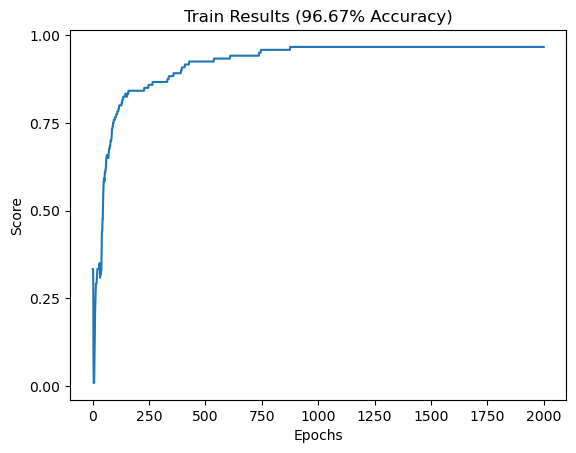

In [13]:
epochs = np.arange(1, len(logreg.fit_scores) + 1).tolist()
e_step = 250
s_step = 0.25

plt.plot(epochs, logreg.fit_scores)
plt.yticks(np.linspace(0, 1, int(1 / s_step) + 1))
plt.xticks([0] + epochs[e_step - 1::e_step])
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title(f"Train Results ({100 * logreg.fit_scores[-1]:.2f}% Accuracy)")
plt.show()

## 4. Evaluation

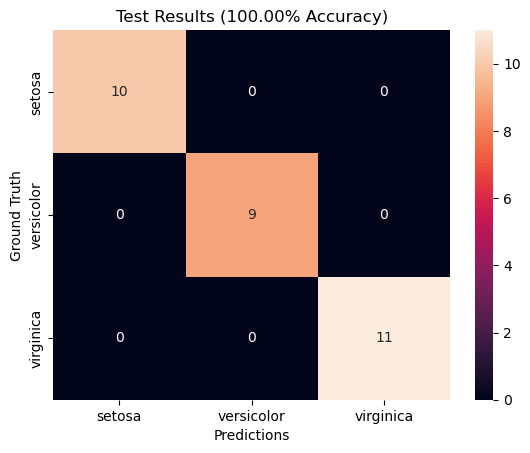

In [14]:
test_predictions = logreg.predict(X_test)
cm = confusion_matrix(y_test, test_predictions)

sns.heatmap(cm, annot=cm, yticklabels=y_names, xticklabels=y_names)
plt.title(f"Test Results ({100 * logreg.score(X_test, y_test):.2f}% Accuracy)")
plt.ylabel("Ground Truth")
plt.xlabel("Predictions")
plt.show()